Key Statistics:
            Visit     MR Delay         Age        EDUC         SES  \
count  373.000000   373.000000  373.000000  373.000000  354.000000   
mean     1.882038   595.104558   77.013405   14.597855    2.460452   
std      0.922843   635.485118    7.640957    2.876339    1.134005   
min      1.000000     0.000000   60.000000    6.000000    1.000000   
25%      1.000000     0.000000   71.000000   12.000000    2.000000   
50%      2.000000   552.000000   77.000000   15.000000    2.000000   
75%      2.000000   873.000000   82.000000   16.000000    3.000000   
max      5.000000  2639.000000   98.000000   23.000000    5.000000   

             MMSE         CDR         eTIV        nWBV         ASF  
count  371.000000  373.000000   373.000000  373.000000  373.000000  
mean    27.342318    0.290885  1488.128686    0.729568    1.195461  
std      3.683244    0.374557   176.139286    0.037135    0.138092  
min      4.000000    0.000000  1106.000000    0.644000    0.876000  
25%     

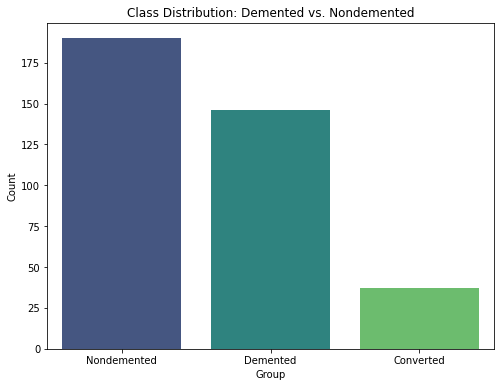

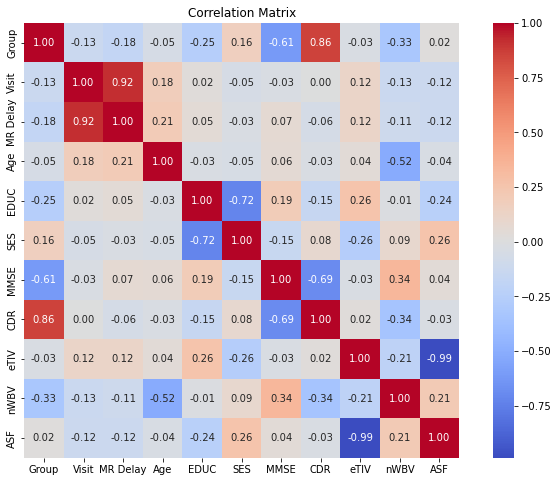

In [2]:
# Reimport necessary libraries and reload the dataset due to session reset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset again
file_path = r"C:\Users\admin\Downloads\dementia_dataset.csv"
dementia_data = pd.read_csv(file_path)

# Summarize key statistics
key_stats = dementia_data.describe()
print("Key Statistics:")
print(key_stats)
# Visualizing class distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=dementia_data, x="Group", palette="viridis")
plt.title("Class Distribution: Demented vs. Nondemented")
plt.xlabel("Group")
plt.ylabel("Count")
plt.show()

# Exploring feature relationships: Correlation matrix
# Encoding categorical variables where necessary
dementia_data_encoded = dementia_data[['Group', 'Visit', 'MR Delay',
       'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']].copy()
dementia_data_encoded['Group'] = dementia_data_encoded['Group'].map({'Nondemented': 0, 'Demented': 1})

# Compute correlation matrix
corr_matrix = dementia_data_encoded.corr()

# Visualize correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Matrix")
plt.show()


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
data = dementia_data.drop(columns=["Subject ID", "MRI ID",'Hand'])
# Handling missing values
data['SES'].fillna(data['SES'].mean(), inplace=True)
data['MMSE'].fillna(data['MMSE'].mean(), inplace=True)

# Encoding categorical variables
le_group = LabelEncoder()
data['Group'] = le_group.fit_transform(data['Group'])

le_gender = LabelEncoder()
data['M/F'] = le_gender.fit_transform(data['M/F'])

# Feature scaling
scaler = StandardScaler()
numeric_cols = ['Age', 'MMSE', 'eTIV', 'nWBV', 'ASF']
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# Train-test split
X = data.drop(columns=["Group"])
y = data["Group"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [4]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.25      0.36         8
           1       0.97      0.97      0.97        29
           2       0.88      1.00      0.94        38

    accuracy                           0.91        75
   macro avg       0.84      0.74      0.76        75
weighted avg       0.89      0.91      0.89        75

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.38      0.50         8
           1       0.97      0.97      0.97        29
           2       0.90      1.00      0.95        38

    accuracy                           0.92        75
   macro avg       0.87      0.78      0.81        75
weighted avg       0.91      0.92      0.91        75



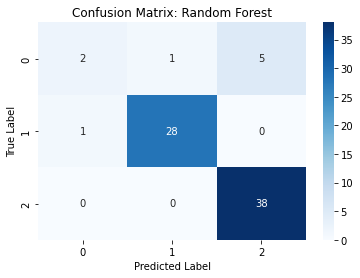

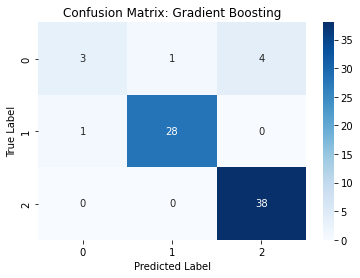

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix: Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Confusion matrix for Gradient Boosting
cm_gb = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(cm_gb, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix: Gradient Boosting")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


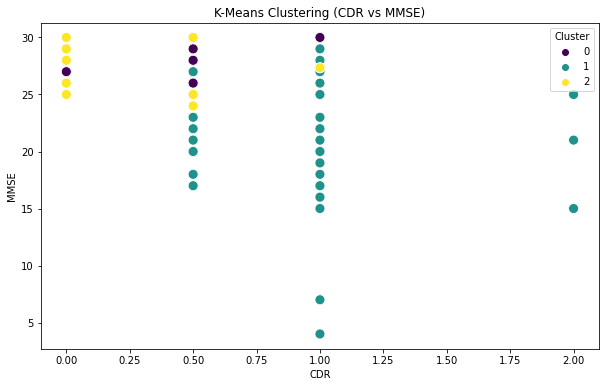

Cluster Centers (Standardized):
[[-0.35683902  0.53120123  0.40644817  1.10504401 -1.0592104 ]
 [ 1.46955781 -0.31265865 -1.63408808  0.10752966 -0.15940387]
 [-0.32071875 -0.18263411  0.35130447 -0.64675663  0.63976322]]

Cluster Sizes:
2    196
0    108
1     69
Name: Cluster, dtype: int64


In [6]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace 'path_to_dataset.csv' with your dataset file path)
file_path =  r"C:\Users\admin\Downloads\dementia_dataset.csv"
data = pd.read_csv(file_path)

# Handle missing values
data['SES'].fillna(data['SES'].mean(), inplace=True)
data['MMSE'].fillna(data['MMSE'].mean(), inplace=True)

# Select top features from the feature importance plot
selected_features = ['CDR', 'MR Delay', 'MMSE', 'eTIV', 'ASF']
clustering_data = data[selected_features]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # You can adjust 'n_clusters' based on the dataset
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the dataset
data['Cluster'] = clusters

# Visualize the clusters (using the first two principal features for simplicity)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=clustering_data['CDR'], y=clustering_data['MMSE'],
    hue=data['Cluster'], palette='viridis', s=100
)
plt.title('K-Means Clustering (CDR vs MMSE)')
plt.xlabel('CDR')
plt.ylabel('MMSE')
plt.legend(title='Cluster')
plt.show()

# Optional: Cluster center visualization
print("Cluster Centers (Standardized):")
print(kmeans.cluster_centers_)

# Analyze cluster sizes
cluster_counts = data['Cluster'].value_counts()
print("\nCluster Sizes:")
print(cluster_counts)
